In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

# Initialize table

In [35]:
# Define parameters
learning_rate = 0.01
discount_factor = 0.95
num_episodes = 1000
max_steps_per_episode = 100

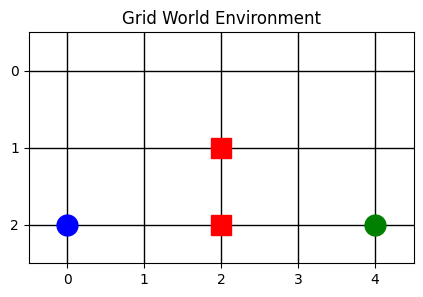

In [36]:
# Define Grid World environment
grid_size = (5,3)
initial_state = (2,0)

# event 
goal_state = (2, 4)
obstacle_states = [(1, 2), (2, 2)]
'''
# event 2
obstacle_states = [(1, 1), (2, 1),
                   (0, 3), (1, 3)]
goal_state = (0, 4)
'''

# Visualize Grid World environment
plt.figure(figsize=(grid_size[0], grid_size[1]))
plt.imshow(np.zeros((grid_size[1], grid_size[0])), cmap='gray', alpha=0)  # Background
plt.xticks(np.arange(grid_size[0]))
plt.yticks(np.arange(grid_size[1]))
plt.grid(True, linewidth=1, color='black')


plt.plot(initial_state[1], initial_state[0], 'bo', markersize=15)
# Visualize goal state
plt.plot(goal_state[1], goal_state[0], 'go', markersize=15)

# Visualize obstacle states
for obstacle in obstacle_states:
    plt.plot(obstacle[1], obstacle[0], 'rs', markersize=15)

plt.title("Grid World Environment")
plt.show()

# Main Function (policy network)

In [37]:
# Define policy network
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.Tanh = nn.Tanh()
        self.fc2 = nn.Linear(128, output_dim)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = self.Tanh(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

In [38]:
# Initialize policy network and optimizer
input_dim = 2
output_dim = 4
policy_network = PolicyNetwork(input_dim, output_dim)
optimizer = optim.Adam(policy_network.parameters(), lr=learning_rate)

In [39]:
# Function to perform a step in the environment
def step(state, action):
    row, col = state
    if action == 0:
        row = max(0, row - 1)
    elif action == 1:
        row = min(grid_size[1] - 1, row + 1)
    elif action == 2:
        col = max(0, col - 1)
    elif action == 3:
        col = min(grid_size[0] - 1, col + 1)

    next_state = (row, col)

    if next_state == goal_state:
        reward = 1
        done = True
    elif next_state in obstacle_states:
        reward = -1
        done = True
    else:
        reward = 0
        done = False

    return next_state, reward, done

# Training

In [40]:
# Define parameters
learning_rate = 0.01
discount_factor = 0.95
num_episodes = 1000
max_steps_per_episode = 700

In [41]:
# Initialize policy network and optimizer
input_dim = 2
output_dim = 4
policy_network = PolicyNetwork(input_dim, output_dim)
optimizer = optim.Adam(policy_network.parameters(), lr=learning_rate)

In [42]:
# REINFORCE training
episode_rewards = []

for episode in range(num_episodes):
    state = initial_state
    done = False
    episode_states = []
    episode_actions = []
    episode_rewards_list = []
    step_count = 0
    total_reward = 0

    while not done and step_count < max_steps_per_episode:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        action_probs = policy_network(state_tensor)
        action = torch.multinomial(action_probs, 1).item()

        next_state, reward, done = step(state, action)

        episode_states.append(state)
        episode_actions.append(action)
        episode_rewards_list.append(reward)

        state = next_state
        total_reward += reward
        step_count += 1

    episode_rewards.append(total_reward)

    # Calculate returns
    returns = []
    G = 0
    for r in reversed(episode_rewards_list):
        G = r + discount_factor * G
        returns.insert(0, G)

    returns = torch.FloatTensor(returns)
    returns = (returns - returns.mean()) / (returns.std() + 1e-8)

    # Calculate loss and update policy network
    loss = 0
    for i in range(len(episode_states)):
        state_tensor = torch.FloatTensor(episode_states[i]).unsqueeze(0)
        action_probs = policy_network(state_tensor)
        action = episode_actions[i]
        log_prob = torch.log(action_probs[0, action])
        loss += -log_prob * returns[i]

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Calculate average reward
average_rewards = np.cumsum(episode_rewards) / (np.arange(len(episode_rewards)) + 1)

# Visualization

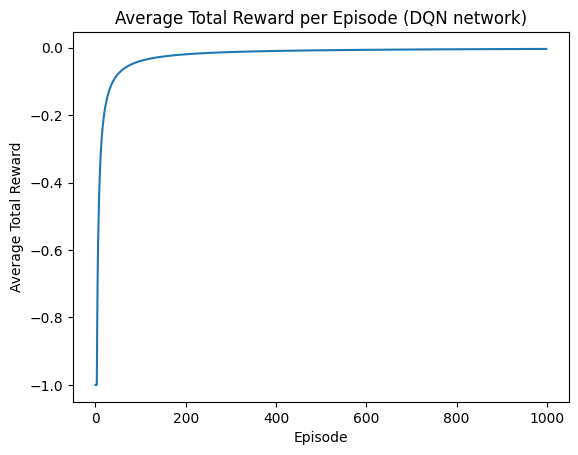

In [43]:
plt.plot(average_rewards)
plt.xlabel("Episode")
plt.ylabel("Average Total Reward")
plt.title("Average Total Reward per Episode (DQN network)")
plt.show()

Path: [(2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (2, 0), (

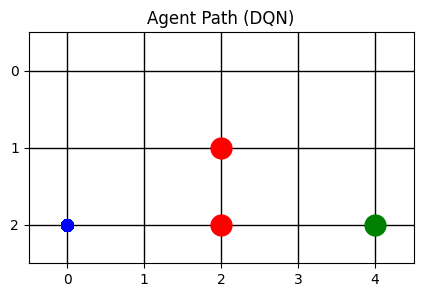

In [45]:
# Test learned agent (REINFORCE)
initial_state = initial_state
state = initial_state
done = False
path = [state]
step_count = 0

while not done and step_count < max_steps_per_episode:
    state_tensor = torch.FloatTensor(state).unsqueeze(0)
    action_probs = policy_network(state_tensor)  # Use policy network to get action probabilities
    action = torch.multinomial(action_probs, 1).item()  # Sample action from the policy
    next_state, reward, done = step(state, action)
    path.append(next_state)
    state = next_state
    step_count += 1

print("Path:", path)

# Visualize agent path
plt.figure(figsize=(grid_size[0], grid_size[1]))
plt.imshow(np.zeros((grid_size[1], grid_size[0])), cmap='gray', alpha=0)
plt.xticks(np.arange(grid_size[0]))
plt.yticks(np.arange(grid_size[1]))
plt.grid(True, linewidth=1, color='black')

plt.plot(goal_state[1], goal_state[0], 'go', markersize=15)

for obstacle in obstacle_states:
    plt.plot(obstacle[1], obstacle[0], 'ro', markersize=15)

path_x = [p[1] for p in path]
path_y = [p[0] for p in path]
plt.plot(path_x, path_y, 'b-o', markersize=8)

plt.title("Agent Path (DQN)")
plt.show()